In [1]:
# import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path=r"C:\Users\omkar\OneDrive\Documents\Gen_AI\Data_files\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

**continent**

In [5]:
visa_df['continent']

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

In [6]:
visa_df['continent'].values

array(['Asia', 'Asia', 'Asia', ..., 'Asia', 'Asia', 'Asia'], dtype=object)

In [7]:
visa_df[['continent']]

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


**unique**

In [9]:
# DA 
# python / SQL / Excel
visa_df
visa_df['continent']
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

**nunique**

In [11]:
visa_df['continent'].nunique()

6

**frequency table**

In [13]:
# Total number of clases : 6
# Total number of rows : 25480
# different count of visa applications are from different companies
# How many applications are from asia

con=visa_df['continent']=='Asia'
con

0         True
1         True
2         True
3         True
4        False
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: continent, Length: 25480, dtype: bool

In [14]:
len(visa_df[con])

16861

In [15]:
# step-1:
visa_df
# step-2: 
visa_df['continent']
# step-3:
con=visa_df['continent']=='Asia'
# step-4:
visa_df[con]
# step-5:
len(visa_df[con])

16861

In [16]:
con=visa_df['continent']=='Asia'
len(visa_df[con])

con=visa_df['continent']=='Africa'
len(visa_df[con])

con=visa_df['continent']=='Asia'
len(visa_df[con])

16861

**task-1**

In [18]:
lables=visa_df['continent'].unique()
count=[]
for i in lables:
    con=visa_df['continent']==i
    value=len(visa_df[con])
    count.append(value)
print(lables)
print(count)

['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
[16861, 551, 3292, 3732, 852, 192]


In [19]:
ft=pd.DataFrame(zip(lables,count),
                columns=['Class','Frequency'])
ft.to_csv('continent_frequency.csv',index=False)

**Value counts**

In [21]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [22]:
lables=visa_df['continent'].value_counts().keys()
count=visa_df['continent'].value_counts().values

In [23]:
visa_df['continent'].value_counts()
lables=visa_df['continent'].value_counts().keys()
count=visa_df['continent'].value_counts().values

**Bar chart**

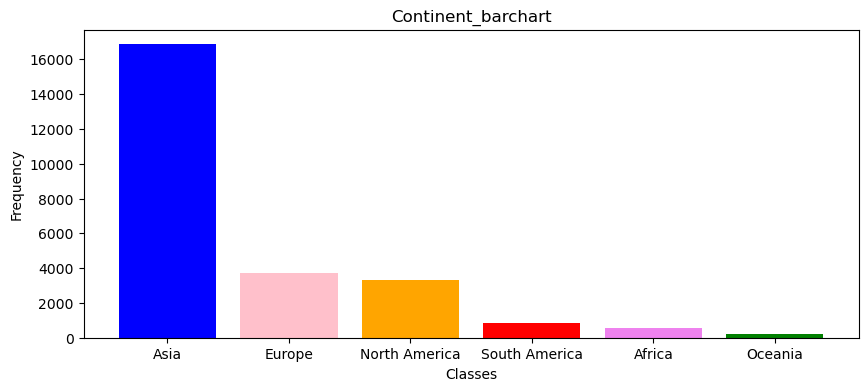

In [25]:
plt.figure(figsize=(10,4))
# x axis: 10 units width
# y axis: 4 units height
col=['blue','pink','orange','red','violet','green']
plt.bar(lables,count,color=col)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Continent_barchart')
plt.savefig('continet_barchart.jpg')
plt.show() # after plt.show no line will be executed

**Relative Frequency table**

In [27]:
visa_df['continent'].value_counts(normalize=True)*100

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

**pie chart**

- for pie chart we need values and keys

In [29]:
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values

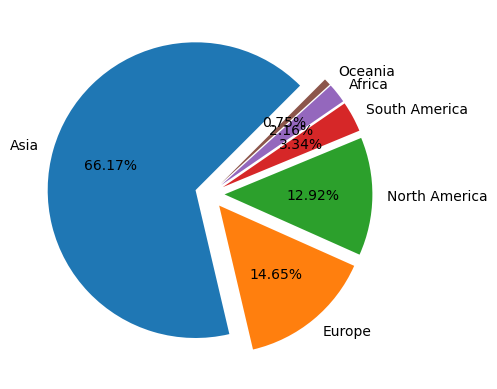

In [30]:
# apply shift tab understand the arguments 
# and provide keys and values explore it with out using chatgpt
# autopct =  '%1.0f%%'    25%
#              1.1f%      25.2%
#              1.2f%      25.34%
#              1.3f%      25.456%
plt.pie(values,
        labels=keys,
        startangle=45,
        autopct='%1.2f%%',
       explode=[0.1,0.1,0.1,0.1,0.1,0.1],
       radius=1)
plt.show()

**subplots**

<Axes: >

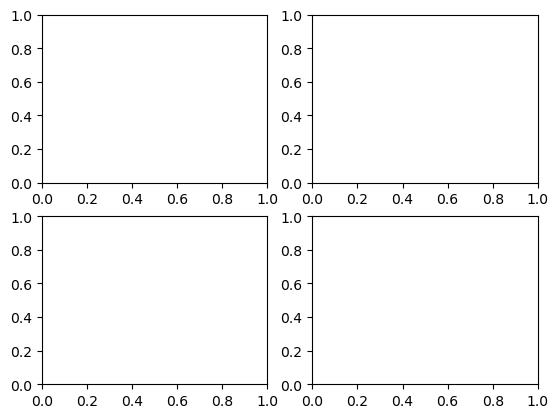

In [32]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

<Axes: >

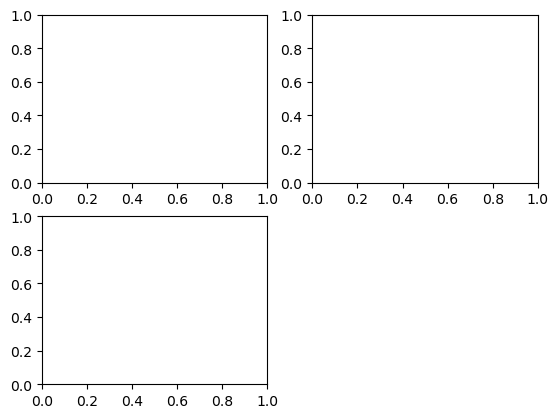

In [33]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)


ValueError: num must be an integer with 1 <= num <= 4, not 5

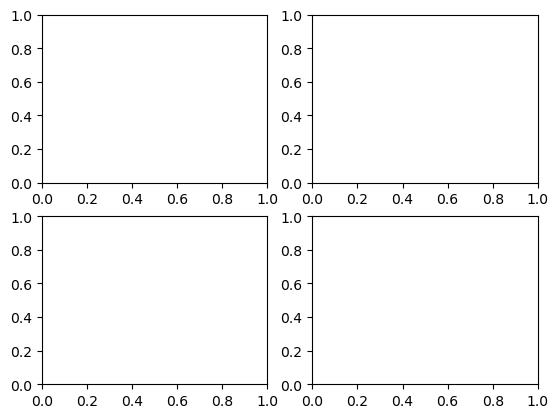

In [34]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)
plt.subplot(2,2,5)

In [ ]:
plt.subplot(1,3,1)
plt.subplot(1,3,2)
plt.subplot(1,3,3)

In [ ]:
plt.subplot(3,1,1)
plt.subplot(3,1,2)
plt.subplot(3,1,3)

In [ ]:
# Take the bar chart code of a continent
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
plt.figure(figsize=(10,4))
plt.bar(keys,values)
plt.xlabel('classes')
plt.ylabel('frequency')
plt.title('continent_barchart')

In [ ]:
# how many categorical columns available : 9
# in that we need to avoid caseid 
# beacuse caseid has 25480 different ids available
visa_df['case_id'].nunique()

# so how many categorical columns available : 8
# what are the possibel layout matrix shape
# 8x1   1x8   2x4   4x2   3x3 

In [ ]:
# we are choose 3x3 layout 8plots
plt.sublpot(3,3,1)
plt.sublpot(3,3,2)
plt.sublpot(3,3,3)


plt.sublpot(3,3,i)

In [ ]:
# idea-1
for i in range(1,len(cat)):
    plt.subplot(3,3,i)

In [ ]:
cat

In [ ]:
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
plt.figure(figsize=(10,4))
plt.bar(keys,values)
plt.xlabel('classes')
plt.ylabel('frequency')
plt.title('continent_barchart')

keys=visa_df['education_of_employee'].value_counts().keys()
values=visa_df['education_of_employee'].value_counts().values
plt.figure(figsize=(10,4))
plt.bar(keys,values)
plt.xlabel('classes')
plt.ylabel('frequency')
plt.title('education_of_employee_barchart')


keys=visa_df[i].value_counts().keys()
values=visa_df[i].value_counts().values
plt.figure(figsize=(10,4))
plt.bar(keys,values)
plt.xlabel('classes')
plt.ylabel('frequency')
plt.title(f'{i}_barchart')

In [ ]:
cat

In [ ]:
for i in cat[1:]:
    keys=visa_df[i].value_counts().keys()
    values=visa_df[i].value_counts().values
    plt.figure(figsize=(10,4))
    plt.bar(keys,values)
    plt.xlabel('classes')
    plt.ylabel('frequency')
    plt.title(f'{i}_barchart')

In [ ]:
for i,j in enumerate(cat[1:]):
    print(i,j)

In [ ]:
n=len(cat[1:])
for i in range(n):
    print(i,cat[i])

In [ ]:
# i index j=col name
plt.figure(figsize=(14,8))
for i,j in enumerate(cat[1:]):
    keys=visa_df[j].value_counts().keys()
    values=visa_df[j].value_counts().values
    plt.subplot(3,3,i+1)
    plt.bar(keys,values)
    plt.xlabel('classes')
    plt.ylabel('frequency')
    plt.title(f'{j}_barchart')


In [ ]:
# idea
# I want to save all the frequency tables
# all the bar charts
# all the pie charts
# in sepertae folder automatically



**create all frequency tables**

In [36]:
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
df=pd.DataFrame(zip(keys,values),
                columns=['Class','Frequency'])
df.to_csv('continent_df.csv',index=False)

**step-1: create a folder**

In [45]:
import os
folder_name='Frequency_table'
try:
    os.makedirs(folder_name)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'Frequency_table'


In [49]:
os.makedirs('Frequency_table1',exist_ok=True)

**step-2: I want to save my df in thos frequncy table floder**

In [52]:
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
df=pd.DataFrame(zip(keys,values),
                columns=['Class','Frequency'])


In [ ]:
# Frequency_table
path=r"C:\Users\omkar\OneDrive\Documents\Data science\Naresh IT\Naresh IT\Data science\Batches\Batch_17_Sep1st\EDA\Frequency_table\continent_df.csv"
df.to_csv('continent_df.csv',index=False)

In [54]:
os.getcwd()+'\'+Frequency_table

'C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Naresh IT\\Data science\\Batches\\Batch_17_Sep1st\\EDA'

In [56]:
directory=os.getcwd()
folder_name='Frequency_table'
os.path.join(directory,folder_name)

'C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Naresh IT\\Data science\\Batches\\Batch_17_Sep1st\\EDA\\Frequency_table'

In [62]:
# step-1: Create a folder
folder_name='Frequency_table'
os.makedirs(folder_name,exist_ok=True)
# step-2: make a new path
directory=os.getcwd()
new_dir=os.path.join(directory,folder_name)
#step-3: make a new location
file_name='continent_df.csv'
path=os.path.join(new_dir,file_name)
path

'C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Naresh IT\\Data science\\Batches\\Batch_17_Sep1st\\EDA\\Frequency_table\\continent_df.csv'

In [64]:
df.to_csv(path,index=False)

In [ ]:
#Step-1: Create a folder
folder_name='Frequency_table'
os.makedirs(folder_name,exist_ok=True)

#Step-2: make a new path
directory=os.getcwd()
new_dir=os.path.join(directory,folder_name)

#Step-3: Create a DataFrame
keys=visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
df=pd.DataFrame(zip(keys,values),
                columns=['Class','Frequency'])

#Step-4: Make the new path
file_name='continent_df.csv'
path=os.path.join(new_dir,file_name)

#Step-5: Save into dataframe
df.to_csv(path,index=False)

In [66]:
#Step-1: Create a folder
folder_name='Frequency_table'
os.makedirs(folder_name,exist_ok=True)

#Step-2: make a new path
directory=os.getcwd()
new_dir=os.path.join(directory,folder_name)

#Step-3: Create a DataFrame
for i in cat[1:]:
    keys=visa_df[i].value_counts().keys()
    values=visa_df[i].value_counts().values
    df=pd.DataFrame(zip(keys,values),
                    columns=['Class','Frequency'])
    
    #Step-4: Make the new path
    file_name=f'{i}_df.csv'
    path=os.path.join(new_dir,file_name)
    
    #Step-5: Save into dataframe
    df.to_csv(path,index=False)